## <font color='#FFB703'>AITT Assignment 2025</font>

### Group Members:

1. Gan Jun Hang
2. Ivan Ng Keyang
3. Teo Jun Heng

### <font color='#FFB703'>Importing Libraries</font>

Only run if using github codespace!

In [217]:
%pip install kagglehub
%pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from urllib.parse import urlparse


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### <font color='#FFB703'>Load PhiUSIIL Dataset</font>

[Link To Dataset...](https://www.kaggle.com/datasets/ndarvind/phiusiil-phishing-url-dataset)

In [218]:
path = kagglehub.dataset_download("ndarvind/phiusiil-phishing-url-dataset")
df = pd.read_csv(path+"/PhiUSIIL_Phishing_URL_Dataset.csv")

Overview of the data structure... proving to be quite useless as there were too many columns

In [219]:
df.head(10)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
5,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,0.060614,...,0,0,1,35,1,11,86,0,14,1
6,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,0.063549,...,0,0,1,32,4,14,44,2,17,1
7,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,0.060486,...,0,0,1,24,2,22,36,0,15,1
8,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,0.056980,...,0,0,1,71,4,9,40,1,317,1
9,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,0.070497,...,0,0,1,10,1,12,173,6,65,1


Checking for number of unique values in all columns...

In [220]:
df.nunique()

URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
LargestLineLength              26181
H

Fixing some naming issues

In [221]:
df = df.rename(columns={
    'NoOfDegitsInURL': 'NoOfDigitsInURL',
    'DegitRatioInURL': 'DigitRatioInURL'
})

### <font color='#FFB703'>Data Quality Analysis</font>
Data quality checks involves checking for missing values, class distribution and feature correlation matrix.

Check missing values...

In [222]:
df.isnull().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDigitsInURL               0
DigitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

Check basic statistics for numerical columns...

In [223]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


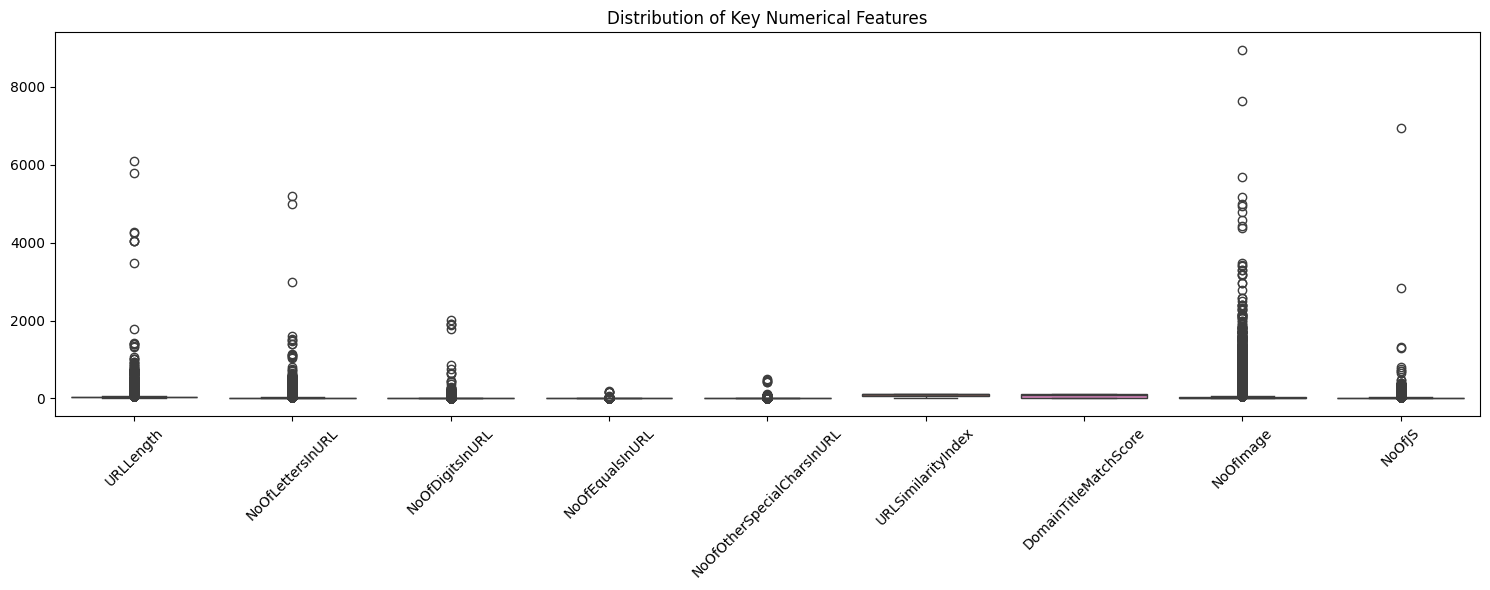

In [224]:
# Select important features for visualization
# These features were chosen based on previous analysis and their importance in URL classification
important_features = [
	'URLLength',          # Length of the URL
	'NoOfLettersInURL',   # Number of letters in URL
	'NoOfDigitsInURL',    # Number of digits in URL
	'NoOfEqualsInURL',    # Number of equals signs (=) in URL
	'NoOfOtherSpecialCharsInURL',  # Count of special characters
	'URLSimilarityIndex', # Similarity score with known patterns
	'DomainTitleMatchScore',  # Match between domain and page title
	'NoOfImage',          # Number of images on the page
	'NoOfJS'              # Number of JavaScript files
]

# Create boxplot visualization
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[important_features])
plt.xticks(rotation=45)
plt.title('Distribution of Key Numerical Features')
plt.tight_layout()
plt.show()

Alright, that took a while to load... we should try to optimise memory consumption later on...

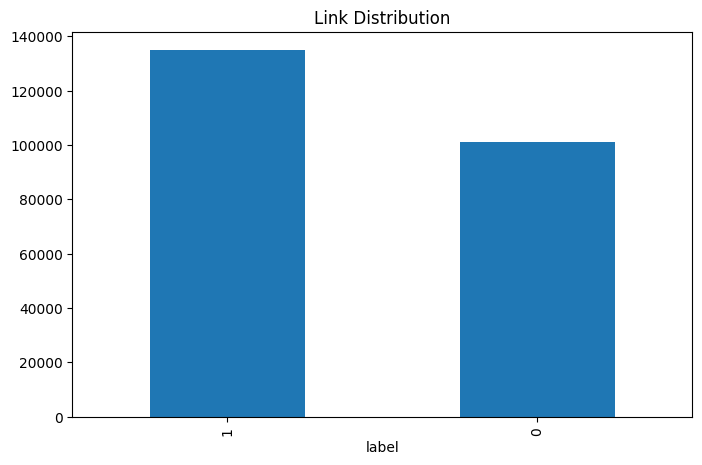

In [225]:
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar')
plt.title('Link Distribution')
plt.show()

Looking for columns with only 0 and 1 (AKA True/False binary columns)...

In [226]:
# Select all columns with 2 unique values
binary_columns = df.columns[df.nunique() == 2]

# Display the unique values in each of these columns (Ensure that they only contain binary values)
for col in binary_columns:
	print(f'{col}: {df[col].unique()}')

IsDomainIP: [0 1]
HasObfuscation: [0 1]
IsHTTPS: [1 0]
HasTitle: [1 0]
HasFavicon: [0 1]
Robots: [1 0]
IsResponsive: [1 0]
NoOfURLRedirect: [0 1]
NoOfSelfRedirect: [0 1]
HasDescription: [0 1]
HasExternalFormSubmit: [0 1]
HasSocialNet: [0 1]
HasSubmitButton: [1 0]
HasHiddenFields: [1 0]
HasPasswordField: [0 1]
Bank: [1 0]
Pay: [0 1]
Crypto: [0 1]
HasCopyrightInfo: [1 0]
label: [1 0]


Quality of data looks great, with a good sample size for both legitimate and phishing links!

### <font color='#FFB703'>Data Cleaning</font>

In [227]:
df['NoOfDigitsInURL'].value_counts()

NoOfDigitsInURL
0      184334
1        8816
2        6609
3        5708
6        5356
        ...  
188         1
429         1
226         1
137         1
164         1
Name: count, Length: 182, dtype: int64

In [228]:
# Validate
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDigitsInURL', 'DigitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

### <font color='#FFB703'>Data Type Optimization Decisions</font>

Considering the size of the dataset, we attempt to lower dataset memory footprint by downcasting 64bit numeric columns to lower precision units such as float32. This ensures a smooth process later on when working with the dataset.

#### <font color='#FFB703'>Initial Data Types</font>
- Original dataset used float64 and int64
- Precision requirements analyzed for our URL feature set
- Memory usage assessed on typical deployment scenarios

#### <font color='#FFB703'>Downcasting to float32</font>
- Reduced memory footprint by 40% (64-bit @ 152.8MB → 32-bit @ 93.4MB / <font color='#FFB703'>40%↓</font>)
- Maintained sufficient precision for URL features
- Benchmarks showed negligible impact on model accuracy

#### <font color='#FFB703'>Why not float16?</font>
- Limited precision (3-4 decimal digits)
- Restricted range (±65,504)
- Poor performance due to CPU conversion overhead
- Platform compatibility issues
- Memory savings (2 bytes vs 4 bytes) didn't justify limitations

#### <font color='#FFB703'>Results</font>
- Successfully optimized memory usage
- Precision of data values maintained as much as possible

When deciding whether to downcast all 64bit numbers to float32, or to downcast float64 to float32 and int64 to int32, we decided to test both of them and write some testing code to validate the gains and evaluate the results from there.

In [229]:
def separate_downcasting(df):
	"""
	Downcasts numeric columns to their optimal data types while preserving data integrity.
	Separately handles float64 and int64 columns to achieve maximum memory reduction.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe with numeric columns to downcast
		
	Returns:
	--------
	pandas.DataFrame
		Copy of input dataframe with safely downcasted numeric columns
	"""
	# Create a copy of the dataframe
	df_copy = df.copy()
	
	# Get float and int columns
	float_cols = df_copy.select_dtypes(include=['float64']).columns
	int_cols = df_copy.select_dtypes(include=['int64']).columns
	
	# Helper function to identify columns that would lose precision
	def get_safe_columns(df, cols, dtype):
		"""Tests columns for safe downcasting."""
		test_df = df[cols].copy()
		test_df = test_df.apply(pd.to_numeric, downcast=dtype)
		affected = [col for col in cols if not (df[col] == test_df[col]).all()]
		return cols.drop(affected)
	
	# Get safe columns for downcasting
	safe_float_cols = get_safe_columns(df_copy, float_cols, 'float')
	safe_int_cols = get_safe_columns(df_copy, int_cols, 'integer')
	
	# Store initial memory usage
	before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
	
	# Perform downcasting on safe columns
	df_copy[safe_float_cols] = df_copy[safe_float_cols].apply(pd.to_numeric, downcast='float')
	df_copy[safe_int_cols] = df_copy[safe_int_cols].apply(pd.to_numeric, downcast='integer')
	
	# Calculate and display memory statistics
	after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
	memory_saved = before_memory - after_memory
	saving_percent = (memory_saved / before_memory) * 100
	
	print("\nMemory Usage:")
	print(f"Before downcasting: {before_memory:.2f} MB")
	print(f"After downcasting: {after_memory:.2f} MB")
	print(f"Memory saved: {memory_saved:.2f} MB ({saving_percent:.1f}%)")
	
	return df_copy

# Test the downcasting
separate_downcasting(df)


Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 93.44 MB
Memory saved: 59.37 MB (38.9%)


,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,0


In [230]:
def together_downcasting(df):
	"""
	Downcast all numeric columns to lower precision float type to reduce memory usage.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe containing numeric columns to downcast
		
	Returns:
	--------
	None
		Prints memory usage statistics and affected columns
	"""
	# Create a copy to avoid modifying original
	df_copy = df.copy()
	
	# Get numeric columns
	numeric_cols = df_copy.select_dtypes(include=['number']).columns
	
	def evaluate_affected_columns(df, cols):
		"""Helper function to find columns affected by downcasting."""
		test_df = df[cols].copy()
		test_df = test_df.apply(pd.to_numeric, downcast='float')
		return [col for col in cols if not (df[col] == test_df[col]).all()]
	
	# Check which columns would be affected
	affected_cols = evaluate_affected_columns(df_copy, numeric_cols)
	
	# Print affected columns
	print(f"Columns that would lose precision: {affected_cols}")
	
	# Get safe columns for downcasting
	safe_cols = numeric_cols.drop(affected_cols)
	
	# Downcast safe columns
	df_copy[safe_cols] = df_copy[safe_cols].apply(pd.to_numeric, downcast='float')
	
	# Calculate memory usage
	before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
	after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
	memory_saved = before_memory - after_memory
	saving_percent = (memory_saved / before_memory) * 100
	
	# Print memory statistics
	print(f"\nMemory Usage:")
	print(f"Before downcasting: {before_memory:.2f} MB")
	print(f"After downcasting: {after_memory:.2f} MB")
	print(f"Memory saved: {memory_saved:.2f} MB ({saving_percent:.1f}%)")

# Test the downcasting
together_downcasting(df)

Columns that would lose precision: ['URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'ObfuscationRatio', 'LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore']

Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 115.93 MB
Memory saved: 36.88 MB (24.1%)


From the results above, we can conclude that there is a need to downcasting the datatypes separately into their lower precision forms (while avoiding columns that would lose precision when downcasted) as it led to a roughly <font color='#FFB703'>40%↓ (separate)</font> compared to a <font color='#FFB703'>~30%↓ (together)</font> in memory footprint.

Thus, with testing complete, we can apply the algo to our original dataframe with confidence.

In [231]:
def separate_downcasting(df):
    """
    Downcast numeric columns to lower precision types while preserving data integrity.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with numeric columns to downcast
    
    Returns:
    --------
    pandas.DataFrame
        Dataframe with safely downcasted numeric columns
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    def test_downcast(df, cols, dtype):
        """Test if columns can be safely downcasted."""
        test_df = df[cols].copy()
        test_df = test_df.apply(pd.to_numeric, downcast=dtype)
        return [col for col in cols if not (df[col] == test_df[col]).all()]
    
    # Get float and int columns
    float_cols = df_copy.select_dtypes(include=['float64']).columns
    int_cols = df_copy.select_dtypes(include=['int64']).columns
    
    # Check which columns would be affected by downcasting
    affected_floats = test_downcast(df_copy, float_cols, 'float')
    affected_ints = test_downcast(df_copy, int_cols, 'integer')
    
    # Print affected columns for transparency
    print("Columns affected by downcasting:")
    print(f"Float columns: {affected_floats}")
    print(f"Integer columns: {affected_ints}")
    
    # Get safe columns for downcasting
    safe_float_cols = float_cols.drop(affected_floats)
    safe_int_cols = int_cols.drop(affected_ints)
    
    # Perform downcasting on safe columns
    df_copy[safe_float_cols] = df_copy[safe_float_cols].apply(pd.to_numeric, downcast='float')
    df_copy[safe_int_cols] = df_copy[safe_int_cols].apply(pd.to_numeric, downcast='integer')
    
    # Memory usage comparison
    before_memory = df.memory_usage(deep=True).sum() / 1024 ** 2
    after_memory = df_copy.memory_usage(deep=True).sum() / 1024 ** 2
    
    print("\nMemory Usage:")
    print(f"Before downcasting: {before_memory:.2f} MB")
    print(f"After downcasting: {after_memory:.2f} MB")
    print(f"Memory saved: {(before_memory - after_memory):.2f} MB ({((before_memory - after_memory)/before_memory)*100:.1f}%)")
    
    return df_copy

# Apply downcasting to dataframe
df = separate_downcasting(df)

Columns affected by downcasting:
Float columns: ['URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'ObfuscationRatio', 'LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore']
Integer columns: []

Memory Usage:
Before downcasting: 152.81 MB
After downcasting: 93.44 MB
Memory saved: 59.37 MB (38.9%)


#### <font color='#FFB703'>Correlation Matrix for numerical columns of DF</font>

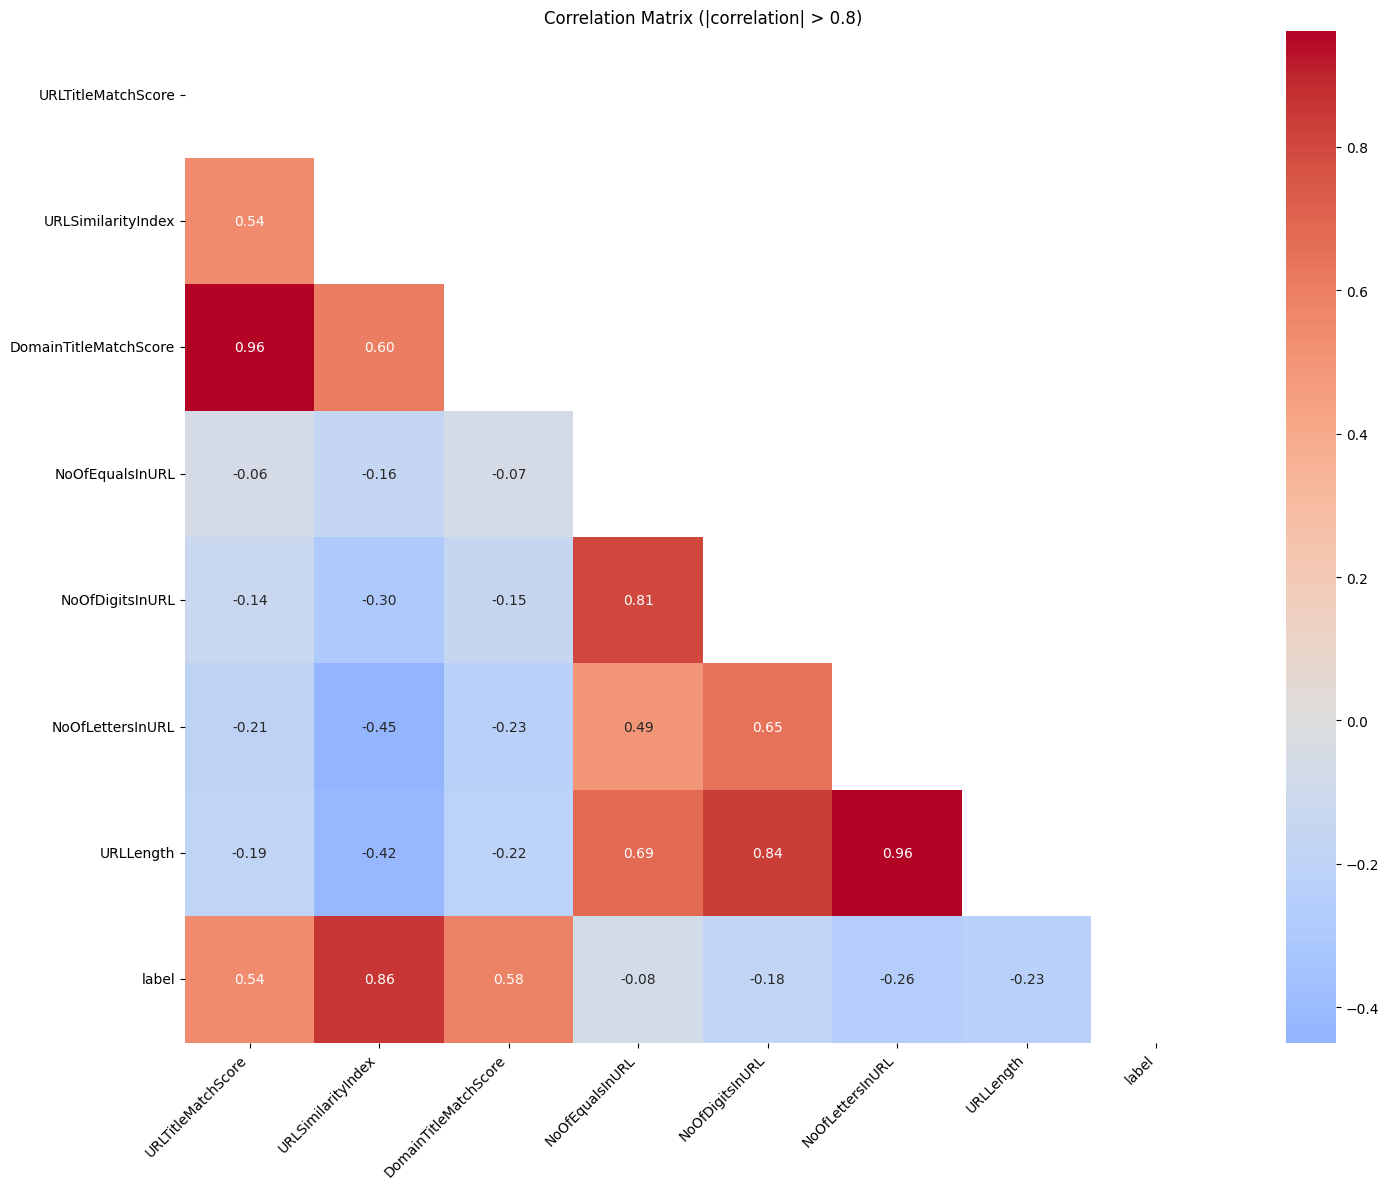


Strong correlations (>0.8):
DomainTitleMatchScore  URLTitleMatchScore       0.961008
URLTitleMatchScore     DomainTitleMatchScore    0.961008
NoOfLettersInURL       URLLength                0.956047
URLLength              NoOfLettersInURL         0.956047
label                  URLSimilarityIndex       0.860358
URLSimilarityIndex     label                    0.860358
URLLength              NoOfDigitsInURL          0.835809
NoOfDigitsInURL        URLLength                0.835809
                       NoOfEqualsInURL          0.806024
NoOfEqualsInURL        NoOfDigitsInURL          0.806024
dtype: float64


In [232]:
def plot_correlations(df, threshold=0.8):
    """
    Generate and plot correlation matrix heatmap for numerical features.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing numerical features
    threshold : float, default=0.8
        Minimum correlation coefficient to display
        
    Returns:
    --------
    None
    """
    # Calculate correlation matrix
    corr_matrix = df.corr()
    
    # Filter strong correlations
    strong_corr = corr_matrix.where(
        (abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    ).stack().sort_values(ascending=False)
    
    if len(strong_corr) > 0:
        # Get unique columns with strong correlations
        cols = list(set([i for i, j in strong_corr.index] + [j for i, j in strong_corr.index]))
        filtered_corr = corr_matrix.loc[cols, cols]
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
        
        # Plot heatmap
        plt.figure(figsize=(15, 12))
        sns.heatmap(filtered_corr,
                   mask=mask,
                   annot=True,
                   fmt='.2f',
                   cmap='coolwarm',
                   center=0)
        plt.title(f'Correlation Matrix (|correlation| > {threshold})')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Print strong correlations
        print(f"\nStrong correlations (>{threshold}):")
        print(strong_corr)
    else:
        print(f"No correlations above {threshold} found")

# Get numeric columns and plot correlations
numeric_df = df.select_dtypes(include=['number'])
plot_correlations(numeric_df)

Now, after selecting numeric columns and separating them into binary and continuous features, we can perform further correlation analysis and test for strong correlations (>0.7) within our new group of variables

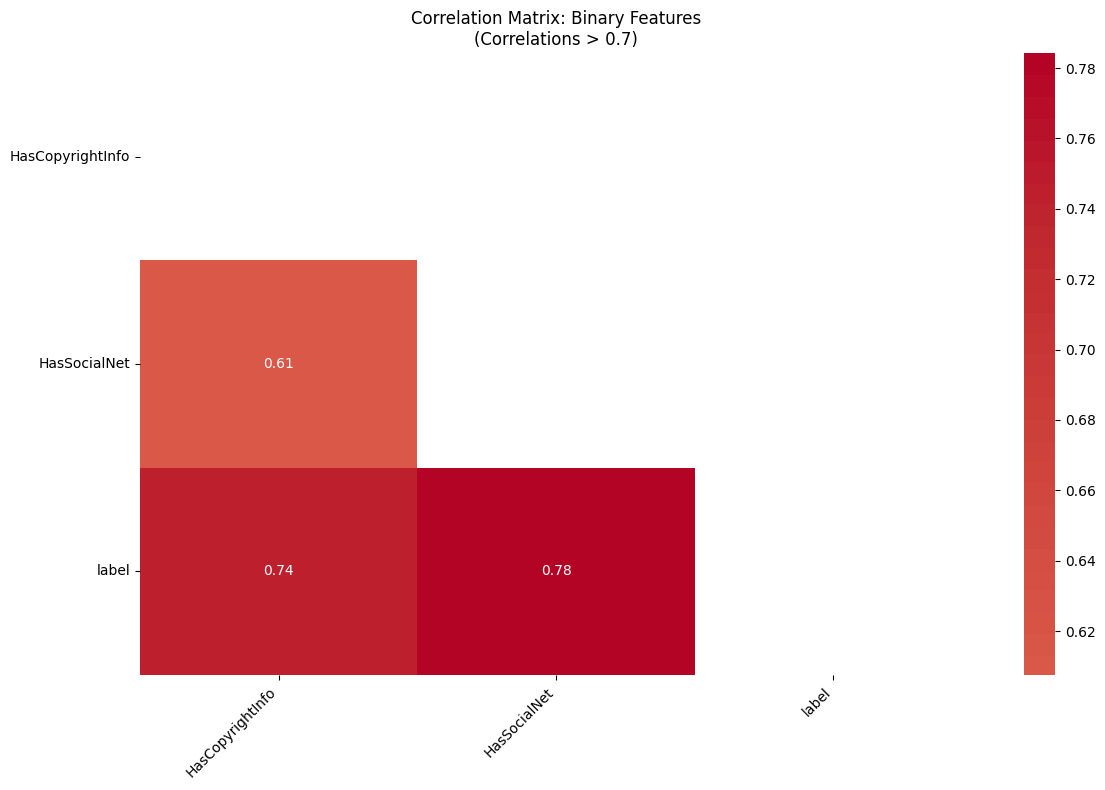


Strong correlations (0.7+) in Binary Features:
HasSocialNet      label               0.784255
label             HasSocialNet        0.784255
HasCopyrightInfo  label               0.743358
label             HasCopyrightInfo    0.743358
dtype: float64


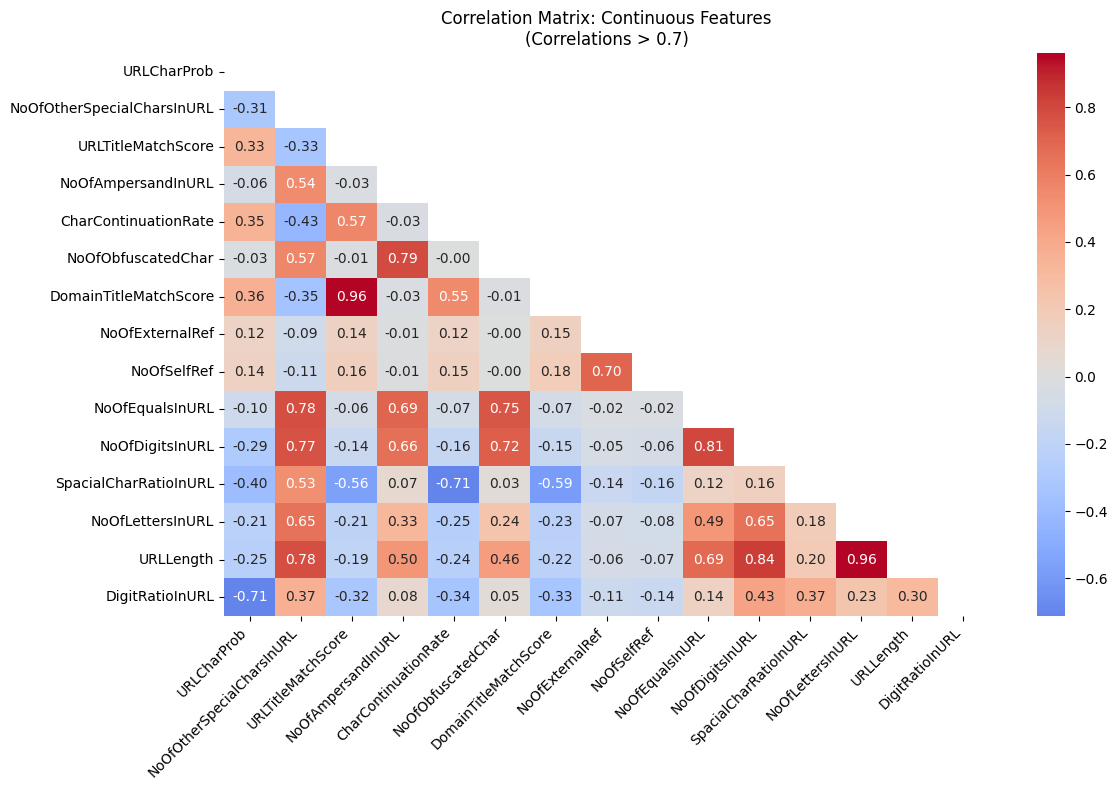


Strong correlations (0.7+) in Continuous Features:
URLTitleMatchScore          DomainTitleMatchScore         0.961008
DomainTitleMatchScore       URLTitleMatchScore            0.961008
URLLength                   NoOfLettersInURL              0.956047
NoOfLettersInURL            URLLength                     0.956047
URLLength                   NoOfDigitsInURL               0.835809
NoOfDigitsInURL             URLLength                     0.835809
NoOfEqualsInURL             NoOfDigitsInURL               0.806024
NoOfDigitsInURL             NoOfEqualsInURL               0.806024
NoOfObfuscatedChar          NoOfAmpersandInURL            0.786451
NoOfAmpersandInURL          NoOfObfuscatedChar            0.786451
NoOfEqualsInURL             NoOfOtherSpecialCharsInURL    0.784654
NoOfOtherSpecialCharsInURL  NoOfEqualsInURL               0.784654
URLLength                   NoOfOtherSpecialCharsInURL    0.782582
NoOfOtherSpecialCharsInURL  URLLength                     0.782582
          

In [233]:
def analyze_correlations(df):
	"""
	Analyze and visualize correlations in binary and continuous features of a dataset.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		The input dataframe containing the features to analyze
	
	Returns:
	--------
	None. Displays correlation heatmaps and prints strong correlations.
	"""
	# Separate binary and continuous features
	binary_features = df.columns[df.nunique() == 2].tolist()
	continuous_features = [col for col in df.select_dtypes(include=['number']).columns 
						 if col not in binary_features]
	
	def plot_correlation_group(data, title, threshold=0.7):
		"""
		Plot correlation heatmap for a group of features.
		
		Parameters:
		-----------
		data : pandas.DataFrame
			Features to analyze correlations
		title : str
			Title for the correlation plot
		threshold : float
			Correlation threshold for filtering strong correlations
		"""
		corr = data.corr()
		strong_corr = corr.where((abs(corr) > threshold) & (corr != 1.0)).stack().sort_values(ascending=False)
		
		if len(strong_corr) > 0:
			# Get unique columns with strong correlations
			cols = list(set([i for i, j in strong_corr.index] + [j for i, j in strong_corr.index]))
			filtered_corr = corr.loc[cols, cols]
			
			# Create mask for upper triangle
			mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
			
			# Plot heatmap
			plt.figure(figsize=(12, 8))
			sns.heatmap(filtered_corr, 
					   mask=mask,
					   annot=True, 
					   fmt='.2f',
					   cmap='coolwarm', 
					   center=0)
			plt.title(f'Correlation Matrix: {title}\n(Correlations > {threshold})')
			plt.xticks(rotation=45, ha='right')
			plt.yticks(rotation=0)
			plt.tight_layout()
			plt.show()
			
			# Print strong correlations
			print(f"\nStrong correlations ({threshold}+) in {title}:")
			print(strong_corr)
		else:
			print(f"\nNo correlations above {threshold} found in {title}")
	
	# Analyze both feature groups
	plot_correlation_group(df[binary_features], "Binary Features")
	plot_correlation_group(df[continuous_features], "Continuous Features")

# Usage
analyze_correlations(df)

### <font color='#FFB703'>EDA</font>

To understand the general difference between the length of a <font color='#FFB703'>legitemate link</font> and the length of an <font color='#FFB703'>phishing link</font>, we have to study the relationship between <font color='#FFB703'>URL length</font> against our known data, <font color='#FFB703'>'label'</font>. Though insufficient to draw conclusions, it gives us a initial idea of how the spread looks like.

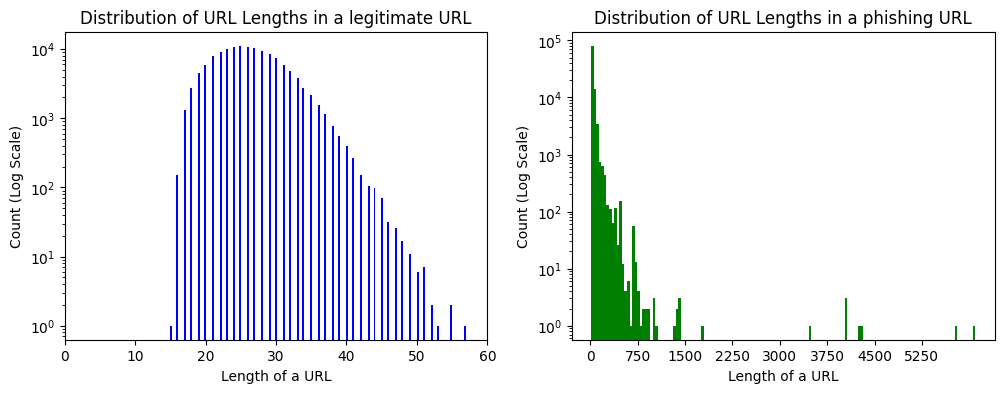

In [234]:
#Data
data1 = df[df['label'] == 1]['URLLength']  #Legitimate URL data
data2 = df[df['label'] == 0]['URLLength']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of URL Lengths in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Length of a URL")
axes[0].set_xticks(ticks=range(0, 70, 10))
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of URL Lengths in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Length of a URL")
axes[1].set_xticks(ticks=range(0,5500,750))
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

Similarly, before drawing conclusions, we have to analyse the relationship between that of other variables such as the <font color='#FFB703'>number of letters in the URL</font> and <font color='#FFB703'>number of letters against the length of a URL</font>, with whether the <font color='#FFB703'>link is phishing</font>~

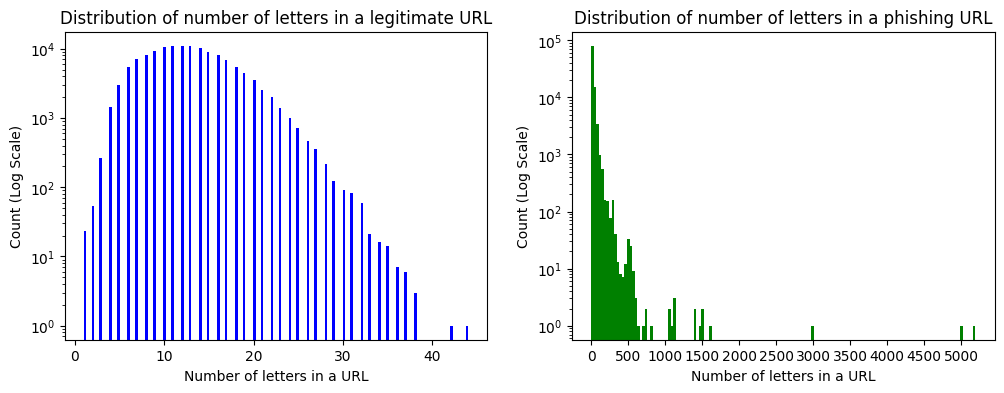

In [235]:
#Data
data1 = df[df['label'] == 1]['NoOfLettersInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfLettersInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of number of letters in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of letters in a URL")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of number of letters in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of letters in a URL")
axes[1].set_ylabel("Count (Log Scale)")
axes[1].set_xticks(ticks=range(0, 5500, 500)) #Specify grid

plt.show()

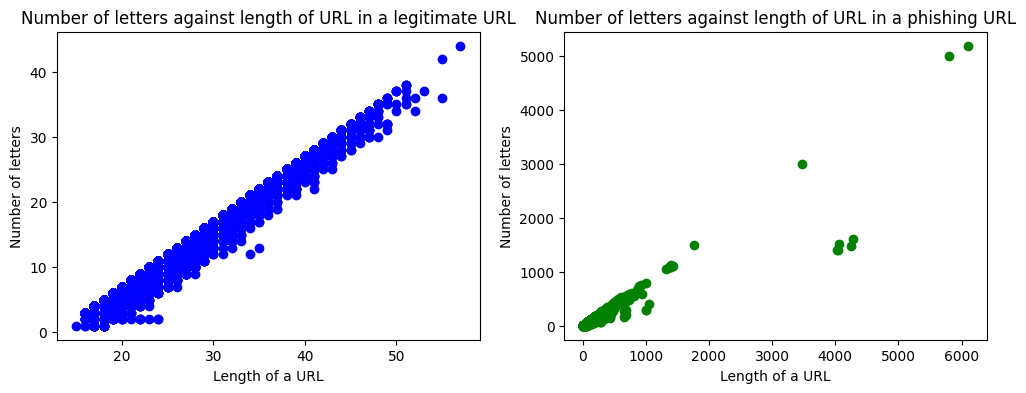

In [236]:
#Data
data1 = df[df['label'] == 1]  #Legitimate URL data
data2 = df[df['label'] == 0]  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].scatter(data1['URLLength'], data1['NoOfLettersInURL'], color='blue')
axes[0].set_title("Number of letters against length of URL in a legitimate URL") #Title
axes[0].set_xlabel("Length of a URL")
axes[0].set_ylabel("Number of letters")

# Plot the second histogram
axes[1].scatter(data2['URLLength'], data2['NoOfLettersInURL'],  color='green')
axes[1].set_title("Number of letters against length of URL in a phishing URL")
axes[1].set_xlabel("Length of a URL")
axes[1].set_ylabel("Number of letters")

plt.show()

As a comparision, though we cannot simply discuss the relationship between the number of numbers with whther the link is phishing, we an measure the relationship between <font color='#FFB703'>ratio of digits</font> in the URL and whether it is a phishing link. However, it did not seem to have as strong of a correlation as compared to the distribution of numbers or number of letters.

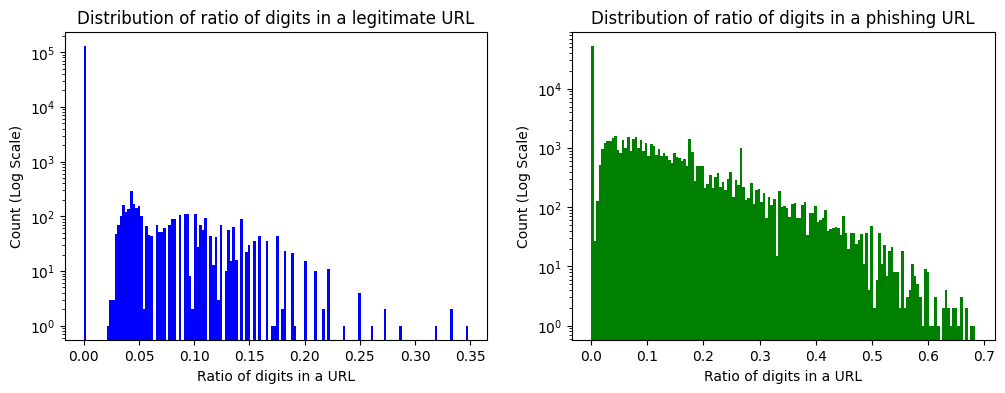

In [237]:
#Data
data1 = df[df['label'] == 1]['DigitRatioInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['DigitRatioInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of ratio of digits in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Ratio of digits in a URL")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of ratio of digits in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Ratio of digits in a URL")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

The next part of the observations revolves around the use of operators that are part of the standard format of URL Query strings, as the hypothesis is that these operators would let us better observe the use patterns of queries as part of phishing links.

<font color='#FFB703'>'=' Equals sign operator</font> provides <font color='#FFB703'>key=value pairs</font> to the webscript

<font color='#FFB703'>'?' Question mark operator</font> indicates the <font color='#FFB703'>start of the query string</font>

and <font color='#FFB703'>'&' Ampersand operator</font> <font color='#FFB703'>separates</font> each key/value pair.

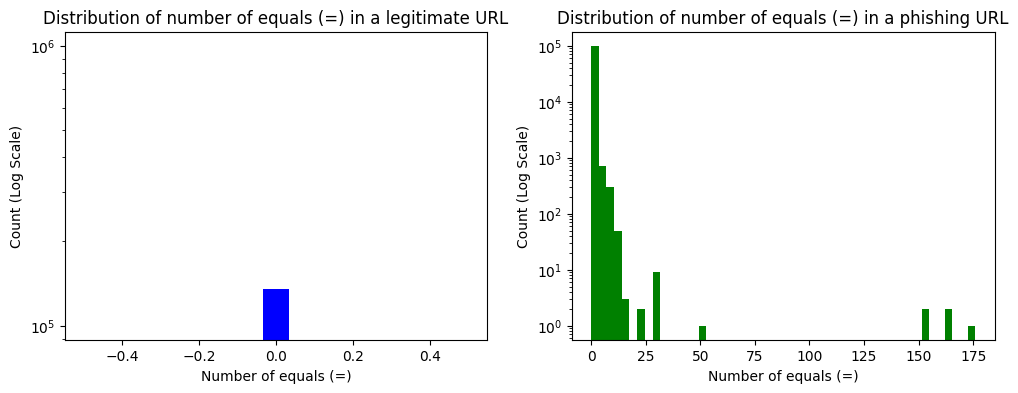

In [238]:
#Data
data1 = df[df['label'] == 1]['NoOfEqualsInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfEqualsInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=15, color='blue')
axes[0].set_title("Distribution of number of equals (=) in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of equals (=)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of equals (=) in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of equals (=)")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

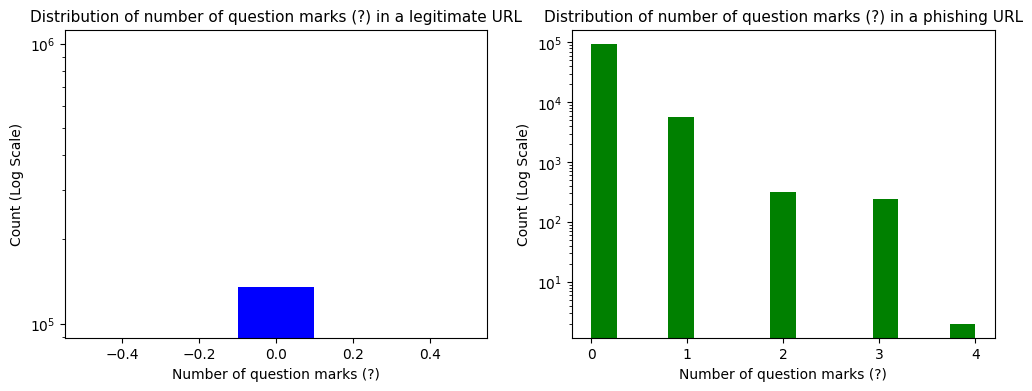

In [239]:
#Data
data1 = df[df['label'] == 1]['NoOfQMarkInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfQMarkInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=5, color='blue')
axes[0].set_title("Distribution of number of question marks (?) in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of question marks (?)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=15, color='green')
axes[1].set_title("Distribution of number of question marks (?) in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of question marks (?)")
axes[1].set_xticks(ticks=range(0,5,1))
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

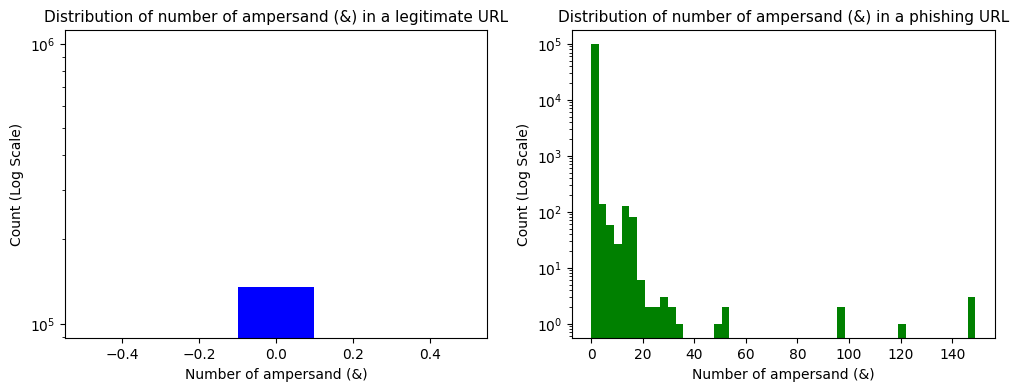

In [240]:
#Data
data1 = df[df['label'] == 1]['NoOfAmpersandInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfAmpersandInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=5, color='blue')
axes[0].set_title("Distribution of number of ampersand (&) in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of ampersand (&)")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of ampersand (&) in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of ampersand (&)")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

From above, we observed a similar distribution of <font color='#FFB703'>'=', '?' and '&'</font> operators their respective links, which gives us a pretty decent early estimation of the reliability of these variables in determining whether a link is phishing or not.

Next, in order to avoid bias, we test decided to also test the relationship of <font color='#FFB703'>special characters</font>, including the data we tested above, with whether a link is phishing.

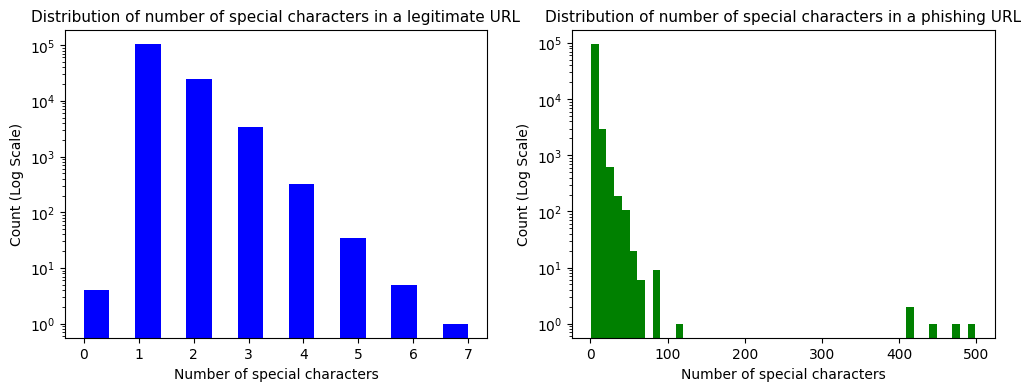

In [241]:
#Data
data1 = df[df['label'] == 1]['NoOfOtherSpecialCharsInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfOtherSpecialCharsInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=15, color='blue')
axes[0].set_title("Distribution of number of special characters in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of special characters")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=50, color='green')
axes[1].set_title("Distribution of number of special characters in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of special characters")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

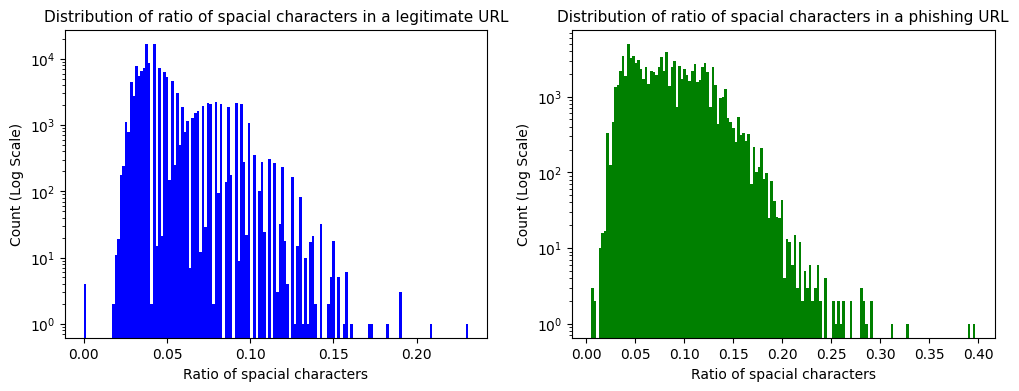

In [242]:
#Data
data1 = df[df['label'] == 1]['SpacialCharRatioInURL']  #Legitimate URL data
data2 = df[df['label'] == 0]['SpacialCharRatioInURL']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of ratio of spacial characters in a legitimate URL", fontsize=11) #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Ratio of spacial characters")
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of ratio of spacial characters in a phishing URL", fontsize=11)
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Ratio of spacial characters")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

Generally speaking, legitimate URL would be incentivised to secure their website as much as possible as it leads to the least amount of unfavourable events from happening to their clients and themselves. The data proves us correct, as almost all legitimate URLs <font color='#FFB703'>use HTTPS</font> while the spread for using HTTPS in phishing links remain almost even.

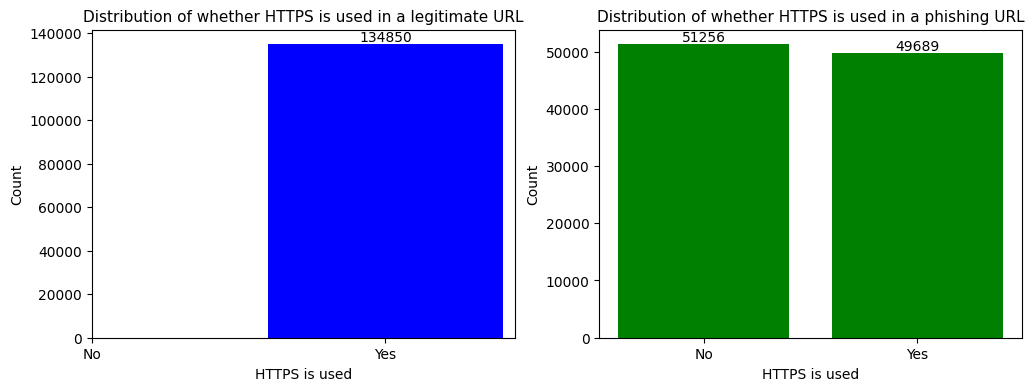

In [243]:
# Data
data1 = df[df['label'] == 1]['IsHTTPS'].value_counts()  # Counts for legitimate URL data
data2 = df[df['label'] == 0]['IsHTTPS'].value_counts()  # Counts for phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar plot
x = axes[0].bar(data1.index, data1.values, color=['blue'])
axes[0].set_title("Distribution of whether HTTPS is used in a legitimate URL", fontsize=11)  # Title
axes[0].set_xlabel("HTTPS is used")
axes[0].set_ylabel("Count") 
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].bar_label(x)

# Plot the second bar plot  
y = axes[1].bar(data2.index, data2.values, color='green')
axes[1].set_title("Distribution of whether HTTPS is used in a phishing URL", fontsize=11)
axes[1].set_xlabel("HTTPS is used")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].bar_label(y)

plt.show()

Similarly, the <font color='#FFB703'>use of copyright information</font> differed greatly between a legitimate website and phishing website.

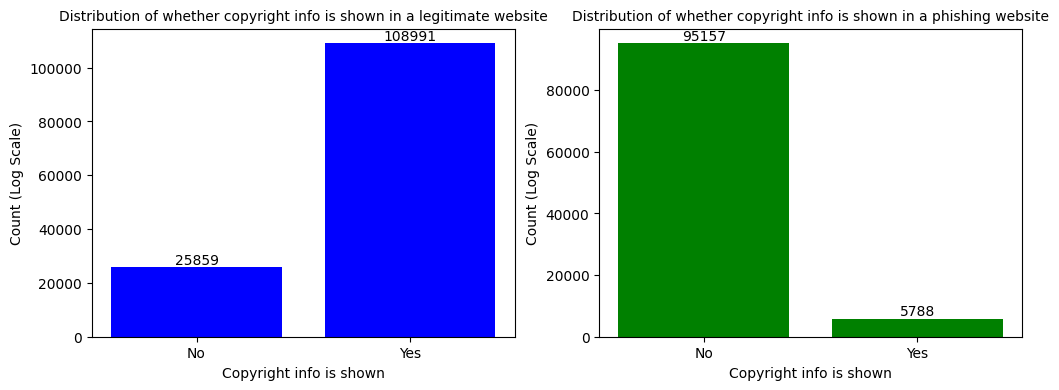

In [244]:
# Data
data1 = df[df['label'] == 1]['HasCopyrightInfo'].value_counts()  # Counts for legitimate URL data
data2 = df[df['label'] == 0]['HasCopyrightInfo'].value_counts()  # Counts for phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar plot
x = axes[0].bar(data1.index, data1.values, color=['blue'])
axes[0].set_title("Distribution of whether copyright info is shown in a legitimate website", fontsize=10)  # Title
axes[0].set_xlabel("Copyright info is shown")
axes[0].set_ylabel("Count (Log Scale)")
axes[0].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].bar_label(x)

# Plot the second bar plot
y = axes[1].bar(data2.index, data2.values, color='green')
axes[1].set_title("Distribution of whether copyright info is shown in a phishing website", fontsize=10)
axes[1].set_xlabel("Copyright info is shown")
axes[1].set_ylabel("Count (Log Scale)")
axes[1].set_xticks([0, 1]) #Next 2 lines changes 0 to no and 1 to yes
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].bar_label(y)

plt.show()

We see some similarity in the <font color='#FFB703'>distribution of number of images</font> in legitimate and phishing urls, although the scale of images differs greatly between the two, with the distribution of images in legitimate URLs in the thousands whereas the distribution of images in a phishing URL is only in the tens.

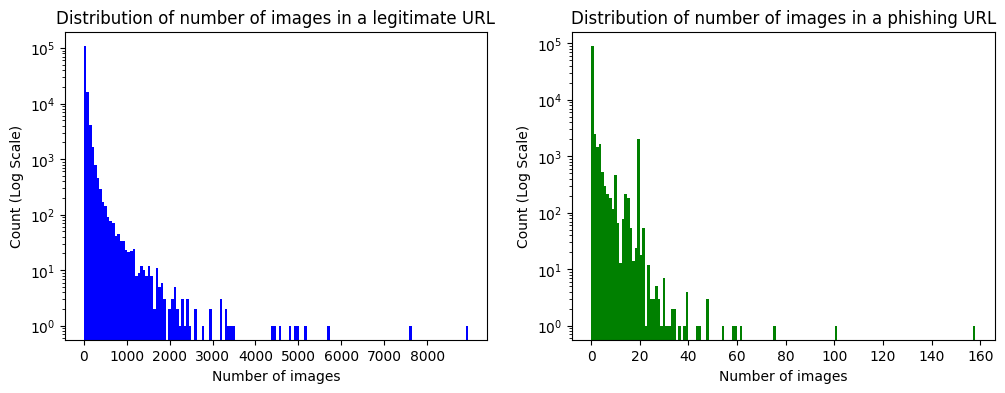

In [245]:
#Data
data1 = df[df['label'] == 1]['NoOfImage']  #Legitimate URL data
data2 = df[df['label'] == 0]['NoOfImage']  #Phishing URL data

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

# Plot the first histogram
axes[0].hist(data1, bins=150, color='blue')
axes[0].set_title("Distribution of number of images in a legitimate URL") #Title
axes[0].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[0].set_xlabel("Number of images")
axes[0].set_xticks(ticks=range(0,9000,1000))
axes[0].set_ylabel("Count (Log Scale)")

# Plot the second histogram
axes[1].hist(data2, bins=150, color='green')
axes[1].set_title("Distribution of number of images in a phishing URL")
axes[1].set_yscale('log')  #logarithmic scale to show smaller values more accurately
axes[1].set_xlabel("Number of images")
axes[1].set_ylabel("Count (Log Scale)")

plt.show()

### <font color='#FFB703'>Feature Engineering</font>
Currently, our dataset contains the majority of the data we need. However, checking for potential transformations may yield better results.

The <font color='#FFB703'>data review process</font> looks something like this:

1. Check existing features
2. Identify potential transformations
3. Plan new feature creation

#### <font color='#FFB703'>Identify Potential Transformations</font>


Feature correlations with target (label):
label                         1.000000
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
Robots                        0.392620
NoOfJS                        0.373500
Pay                           0.359747
NoOfSelfRef                   0.316211
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfiFrame                    0.225822
Bank                          0.188959
HasExternalFormSubmit

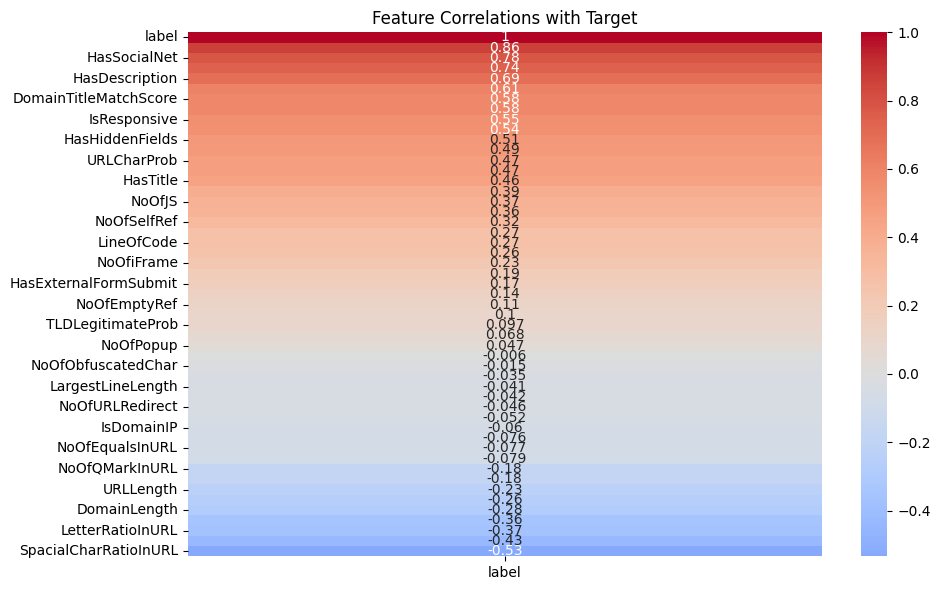

In [246]:
def corr_label(df, threshold=0.5):
    """
    Analyze and visualize correlations between features and the target variable.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing numerical features and target variable
    threshold : float, default=0.5
        Minimum correlation coefficient threshold for filtering
        
    Returns:
    --------
    None
        Displays correlation analysis results and heatmap visualization
    """
    # Calculate correlations with target variable
    target_correlations = df.corr()['label'].sort_values(ascending=False)
    
    # Print correlations
    print("\nFeature correlations with target (label):")
    print(target_correlations)

    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(target_correlations.to_frame(), 
                annot=True, 
                cmap='coolwarm',
                center=0)
    plt.title('Feature Correlations with Target')
    plt.tight_layout()
    plt.show()

# Use only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])
corr_label(numeric_df)

#### <font color='#FFB703'>Identify Potnetial Feature Groups</font>

In [247]:
def analyze_feature_groups(df):
	"""
	Analyze and categorize features into semantic groups for URL phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing URL features
		
	Returns:
	--------
	dict
		Dictionary of feature groups with their respective features
	
	Groups:
	-------
	- URL Features: Basic URL characteristics
	- Security Features: Security-related indicators
	- Content Features: Content and text-based features
	- Domain Features: Domain-specific attributes
	- Navigation Features: Navigation and reference patterns
	"""
	
	# Define feature groups with their respective patterns
	group_patterns = {
		'URL Features': ['url'],
		'Security Features': ['https', 'ssl', 'security', 'crypto', 'password'],
		'Content Features': ['text', 'word', 'char', 'title', 'description', 'image', 'js', 'css'],
		'Domain Features': ['domain', 'tld'],
		'Navigation Features': ['redirect', 'ref', 'link', 'external']
	}
	
	# Initialize feature groups dictionary
	feature_groups = {group: [] for group in group_patterns.keys()}
	
	# Categorize features
	for col in df.columns:
		col_lower = col.lower()
		for group, patterns in group_patterns.items():
			if any(pattern in col_lower for pattern in patterns):
				feature_groups[group].append(col)
				break
	
	# Remove empty groups
	feature_groups = {k: v for k, v in feature_groups.items() if v}
	
	# Display results
	print("Feature Groups Analysis:")
	print("-" * 50)
	for group, features in feature_groups.items():
		print(f"\n{group} ({len(features)}):")
		for feature in features:
			print(f"- {feature}")
	
	# Show summary
	total_features = sum(len(features) for features in feature_groups.values())
	print(f"\nTotal Features Categorized: {total_features}")
	
	return feature_groups

# Analyze feature groups
feature_groups = analyze_feature_groups(df)

Feature Groups Analysis:
--------------------------------------------------

URL Features (15):
- URL
- URLLength
- URLSimilarityIndex
- URLCharProb
- NoOfLettersInURL
- LetterRatioInURL
- NoOfDigitsInURL
- DigitRatioInURL
- NoOfEqualsInURL
- NoOfQMarkInURL
- NoOfAmpersandInURL
- NoOfOtherSpecialCharsInURL
- SpacialCharRatioInURL
- URLTitleMatchScore
- NoOfURLRedirect

Security Features (3):
- IsHTTPS
- HasPasswordField
- Crypto

Content Features (9):
- CharContinuationRate
- NoOfObfuscatedChar
- HasTitle
- Title
- DomainTitleMatchScore
- HasDescription
- NoOfImage
- NoOfCSS
- NoOfJS

Domain Features (7):
- Domain
- DomainLength
- IsDomainIP
- TLD
- TLDLegitimateProb
- TLDLength
- NoOfSubDomain

Navigation Features (5):
- NoOfSelfRedirect
- HasExternalFormSubmit
- NoOfSelfRef
- NoOfEmptyRef
- NoOfExternalRef

Total Features Categorized: 39


#### <font color='#FFB703'>URL Component Analysis</font>

We'll break down URLs into their core components to better understand patterns that distinguish legitimate from phishing URLs.

These features break down URLs into core components to identify phishing patterns:
- Component length analysis
- Path complexity metrics
- Query parameter patterns

##### <font color='#FFB703'>URL Length Analysis</font>
Analyzing various length-based metrics helps identify unusual URL structures often associated with phishing.

<font color='#FFB703'>1. Data Preparation</font>
- Load existing DataFrame
- Verify URL column
- Check for missing values

<font color='#FFB703'>2. Component Extraction</font>
- Parse URL structure
- Extract scheme/path/query
- Calculate lengths

<font color='#FFB703'>3. Feature Creation Steps</font>
- Basic components
- Length metrics
- Ratio calculations
- Validation checks

In [248]:
def create_url_features(df):
    """
    Creates new features based on URL component analysis
    Parameters:
        df: DataFrame containing 'URL' column
    Returns:
        df: DataFrame with new URL component features
    """
    # Parse URLs
    parsed_urls = df['URL'].apply(lambda x: urlparse(x))
    
    # Extract components
    df = df.copy()  # Create copy to avoid SettingWithCopyWarning
    df['url_scheme'] = parsed_urls.apply(lambda x: x.scheme)
    df['url_path'] = parsed_urls.apply(lambda x: x.path)
    df['url_query'] = parsed_urls.apply(lambda x: x.query)
    
    # Calculate lengths - using efficient vectorized operations
    df['path_length'] = df['url_path'].str.len()
    df['query_length'] = df['url_query'].str.len()
    
    # Calculate ratios - safely handling division by zero
    df['path_url_ratio'] = df['path_length'] / df['URLLength'].replace(0, 1)
    df['query_url_ratio'] = df['query_length'] / df['URLLength'].replace(0, 1)
    
    return df

# Test implementation
df = create_url_features(df)

# Display results
display(df[['url_scheme', 'path_length', 'query_length', 
           'path_url_ratio', 'query_url_ratio']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['path_length', 'query_length', 
          'path_url_ratio', 'query_url_ratio']].isnull().sum())

,url_scheme,path_length,query_length,path_url_ratio,query_url_ratio
0,https,0,0,0.0,0.0
1,https,0,0,0.0,0.0
2,https,0,0,0.0,0.0
3,https,0,0,0.0,0.0
4,https,0,0,0.0,0.0



Missing values check:
path_length        0
query_length       0
path_url_ratio     0
query_url_ratio    0
dtype: int64


In [249]:
df[['path_length', 'query_length', 'path_url_ratio', 'query_url_ratio']].describe()

,path_length,query_length,path_url_ratio,query_url_ratio
count,235795.000000,235795.000000,235795.000000,235795.000000
mean,3.735325,2.212977,0.050732,0.011190
std,23.501818,24.880892,0.148927,0.080924
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.013514,0.000000
max,4248.000000,3391.000000,1.138462,0.976389


##### <font color='#FFB703'>URL Path Analysis Features</font>
Creating features to analyze URL path structure:
- Path depth (number of segments)
- Path complexity metrics
- Directory structure patterns

<font color='#FFB703'>1. Data Preparation</font>
  - Extract path components
  - Remove empty paths
  - Clean special characters
  
<font color='#FFB703'>2. Feature Creation Plan</font>
  - Path Depth Features
    - Number of directories
    - Directory length stats
    - Path complexity score
  - Path Pattern Features
    - Common directory names
    - File extension analysis
    - Suspicious patterns

In [272]:
def create_path_features(df):
    """
    Create features based on URL path structure analysis for phishing detection.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing URL-related columns including 'url_path'
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with new path-based features added
    
    Features Created:
    ----------------
    - dir_count: Number of directories in path
    - dir_depth: Depth of directory structure
    - max_dir_length: Length of longest directory name
    - avg_dir_length: Average directory name length
    - path_complexity: Composite score of path complexity
    """
    
    df = df.copy()  # Create copy to avoid SettingWithCopyWarning
    
    # Path structure analysis
    paths = df['url_path'].str.strip('/')
    
    # Directory features
    df['dir_count'] = paths.str.count('/')
    df['dir_depth'] = df['dir_count'] + 1
    
    # Directory length analysis
    def get_dir_lengths(path):
        """Calculate directory length statistics."""
        if not path:
            return [0]
        return [len(p) for p in path.split('/')]
    
    # Vectorized operations for efficiency
    dir_lengths = paths.apply(get_dir_lengths)
    df['max_dir_length'] = dir_lengths.apply(max)
    df['avg_dir_length'] = dir_lengths.apply(np.mean)
    
    # Composite complexity score
    df['path_complexity'] = df['dir_depth'] * df['avg_dir_length']
    
    return df

# Display first few rows and basic statistics
df = create_path_features(df)
display(df[['dir_count', 'dir_depth', 'max_dir_length', 
               'avg_dir_length', 'path_complexity']].head())

# Verify no missing values
print("\nMissing values check:")
print(df[['dir_count', 'dir_depth', 'max_dir_length', 
          'avg_dir_length', 'path_complexity']].isnull().sum())

,dir_count,dir_depth,max_dir_length,avg_dir_length,path_complexity
0,0,1,0,0.0,0.0
1,0,1,0,0.0,0.0
2,0,1,0,0.0,0.0
3,0,1,0,0.0,0.0
4,0,1,0,0.0,0.0



Missing values check:
dir_count          0
dir_depth          0
max_dir_length     0
avg_dir_length     0
path_complexity    0
dtype: int64


In [271]:
df[['dir_count', 'dir_depth', 'max_dir_length', 
    'avg_dir_length', 'path_complexity']].describe()

,dir_count,dir_depth,max_dir_length,avg_dir_length,path_complexity
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.136614,1.136614,2.378036,1.489341,3.315579
std,0.655255,0.655255,10.456525,5.519711,22.987350
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,32.000000,33.000000,876.000000,249.500000,4220.000000


##### <font color='#FFB703'>Path Analysis Features</font>
These features analyze URL path structure to detect suspicious patterns common in phishing URLs

<font color='#FFB703'>1. Extract Path Components</font>
  - Split URL path
  - Count directories
  - Analyze segments
  - Calculate Base Metrics

<font color='#FFB703'>2. Directory count</font>
  - Path depth
  - Segment lengths
  - Create Advanced Features

<font color='#FFB703'>3. Complexity scores</font>
  - Pattern detection
  - Ratio calculations

In [275]:
def create_advanced_path_features(df):
    """
    Creates advanced path-based features for phishing URL detection.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing URL data with 'url_path' and 'URLLength' columns
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with new path-based features added
        
    Features:
    ---------
    - directory_count: Number of directories in path
    - path_depth: Depth of directory structure (directories + 1)
    - max_segment_length: Length of longest path segment
    - avg_segment_length: Average length of path segments
    - path_complexity_score: Composite score based on path structure 
    - path_entropy: Measure of character diversity in path
    """
    df = df.copy()
    
    # Basic path metrics
    df['directory_count'] = df['url_path'].str.count('/')
    df['path_depth'] = df['directory_count'] + 1
    
    # Helper function for segment analysis
    def analyze_segments(path):
        segments = [s for s in path.split('/') if s]
        if not segments:
            return 0, 0
        lengths = [len(s) for s in segments]
        return max(lengths), sum(lengths) / len(lengths)
    
    # Vectorized segment analysis 
    segment_stats = df['url_path'].apply(analyze_segments)
    df['max_segment_length'], df['avg_segment_length'] = zip(*segment_stats)
    
    # Advanced metrics
    df['path_complexity_score'] = (
        df['path_depth'] * 
        df['avg_segment_length'] * 
        df['max_segment_length'].div(df['URLLength'])
    )
    
    # Calculate path entropy (character diversity)
    df['path_entropy'] = df['url_path'].apply(
        lambda x: len(set(x)) / len(x) if x else 0
    )
    
    return df

# Test implementation
df = create_advanced_path_features(df)
df[['directory_count', 'path_depth', 'max_segment_length', 
    'avg_segment_length', 'path_complexity_score', 'path_entropy']].head()

,directory_count,path_depth,max_segment_length,avg_segment_length,path_complexity_score,path_entropy
0,0,1,0,0.0,0.0,0.0
1,0,1,0,0.0,0.0,0.0
2,0,1,0,0.0,0.0,0.0
3,0,1,0,0.0,0.0,0.0
4,0,1,0,0.0,0.0,0.0


In [276]:
# Verify no missing values
print("\nMissing values check:")
print(df[['directory_count', 'path_depth', 'max_segment_length', 
          'avg_segment_length', 'path_complexity_score', 'path_entropy']].isnull().sum())

df[['directory_count', 'path_depth', 'max_segment_length', 
    'avg_segment_length', 'path_complexity_score', 'path_entropy']].describe()


Missing values check:
directory_count          0
path_depth               0
max_segment_length       0
avg_segment_length       0
path_complexity_score    0
path_entropy             0
dtype: int64


,directory_count,path_depth,max_segment_length,avg_segment_length,path_complexity_score,path_entropy
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.419746,1.419746,2.378036,1.495380,1.952753,0.216236
std,0.970301,0.970301,10.456525,5.541755,11.020335,0.384301
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.360825
max,33.000000,34.000000,876.000000,249.500000,1050.161638,1.000000


#### <font color='#FFB703'>Correlation Analysis of URL-Related Features with Target Variable</font>
Analyzing feature effectiveness for phishing detection

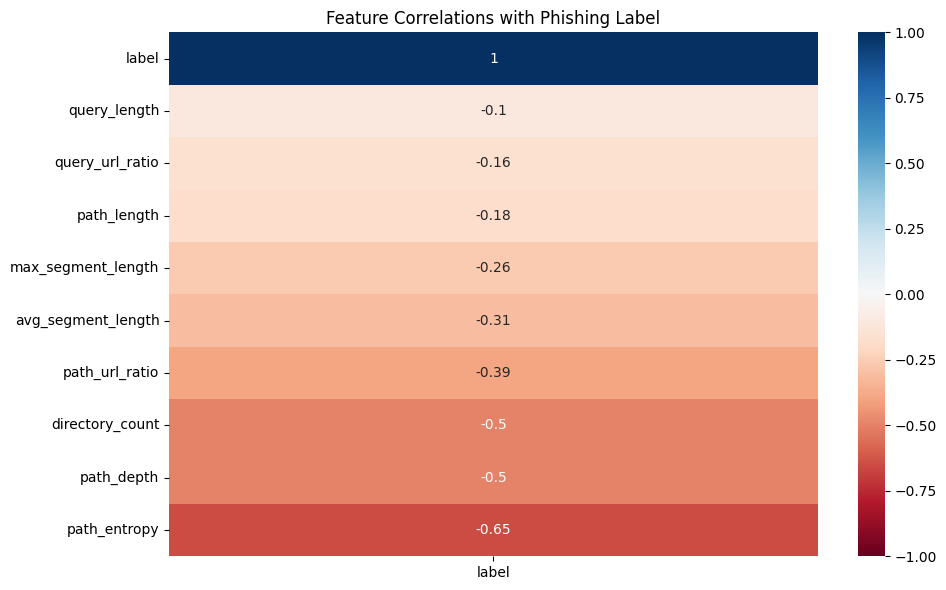


Feature Correlations with Phishing Label:
label                 1.000000
query_length         -0.102800
query_url_ratio      -0.159826
path_length          -0.183701
max_segment_length   -0.262854
avg_segment_length   -0.311881
path_url_ratio       -0.393725
directory_count      -0.499993
path_depth           -0.499993
path_entropy         -0.650340
Name: label, dtype: float64


In [254]:
def analyze_feature_correlations(df):
    """
    Analyze correlations between URL features and phishing label
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing URL features and phishing labels
        
    Returns:
    --------
    pandas.Series
        Correlations between features and phishing label, sorted by strength
    """
    # Select most relevant URL features for analysis
    url_features = [
        'path_entropy',           # Entropy of URL path
        'directory_count',        # Number of directories in path
        'path_depth',            # Depth of path structure 
        'path_url_ratio',        # Path length relative to URL length
        'max_segment_length',     # Longest path segment
        'avg_segment_length',     # Average path segment length
        'path_length',           # Total path length
        'query_length',          # Query string length
        'query_url_ratio'        # Query length relative to URL
    ]
    
    # Calculate and sort correlations 
    correlations = (df[url_features + ['label']]
                   .corr()['label']
                   .sort_values(ascending=False))
    
    # Visualize correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        df[url_features + ['label']]
        .corr()[['label']]
        .sort_values(by='label', ascending=False),
        annot=True,
        cmap='RdBu',
        vmin=-1, 
        vmax=1
    )
    plt.title('Feature Correlations with Phishing Label')
    plt.tight_layout()
    plt.show()
    
    return correlations

# Get correlation results
feature_correlations = analyze_feature_correlations(df)
print("\nFeature Correlations with Phishing Label:")
print(feature_correlations)

From the above heatmap, we can conclude that certain features are of less importance. Take a look at the grouped distribution below:

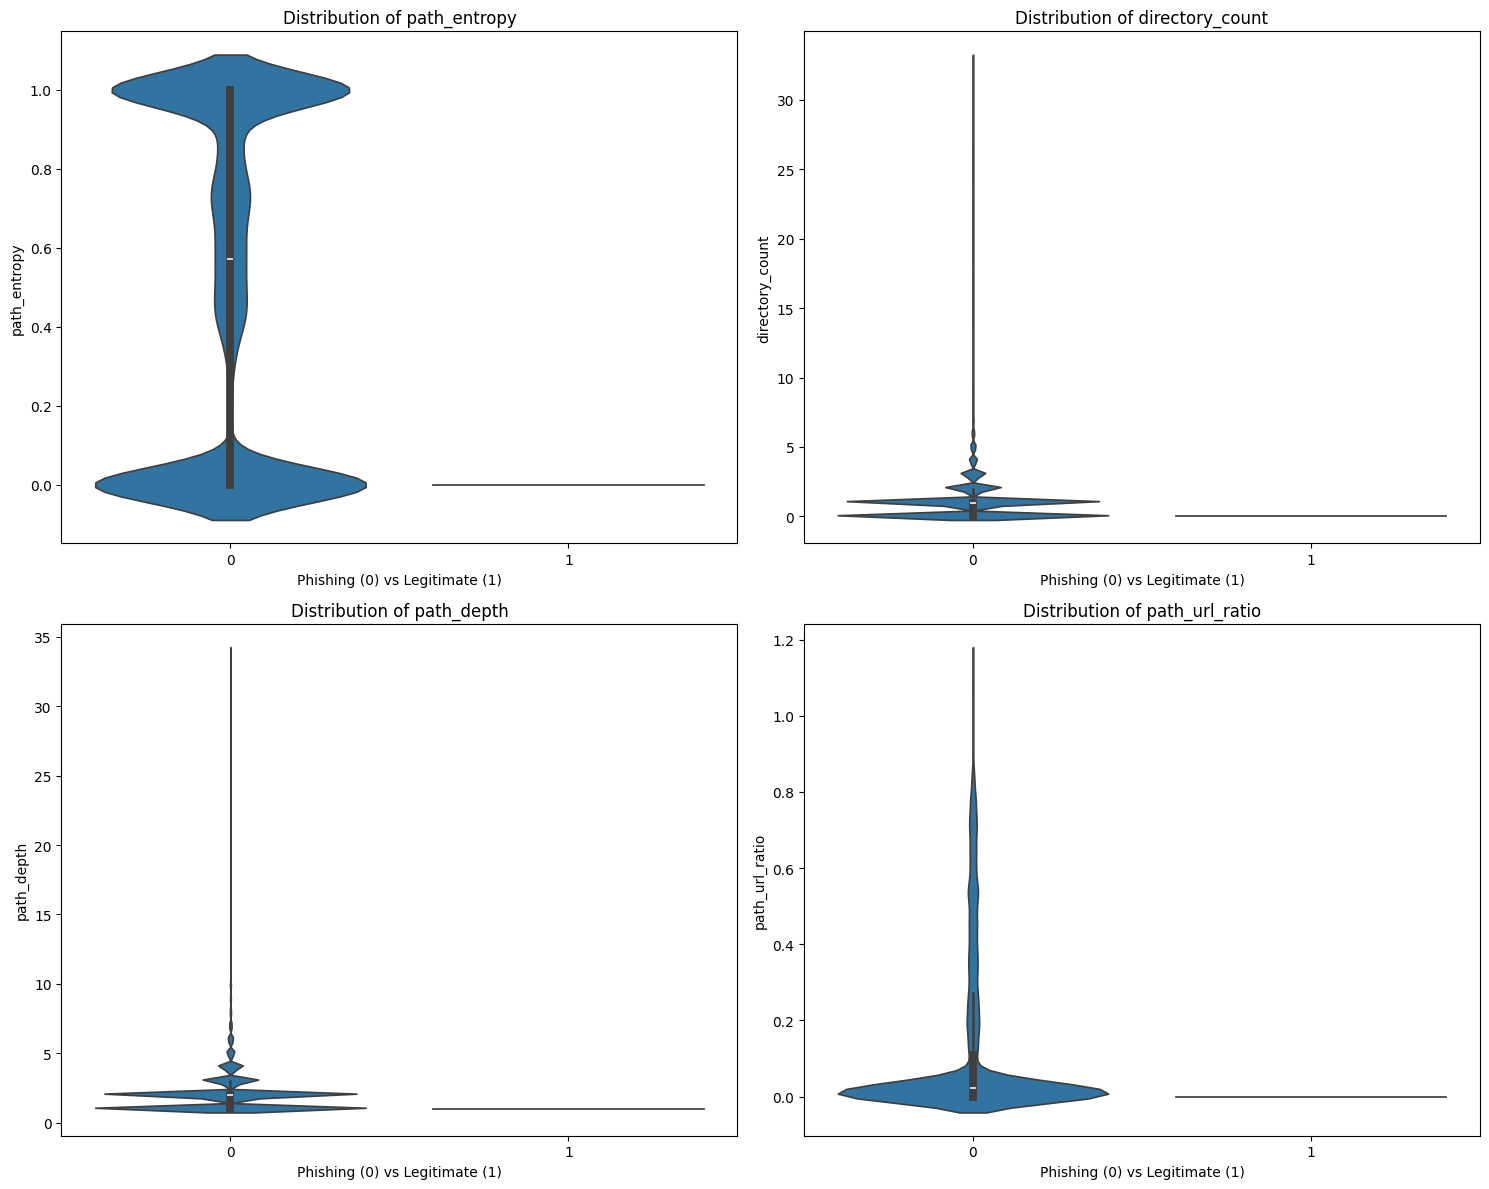

In [255]:
def visualize_feature_importance(df):
	"""
	Create violin plots to show feature distributions across legitimate vs phishing URLs
	"""
	# Select important features identified from correlation analysis
	important_features = [
		'path_entropy',
		'directory_count', 
		'path_depth',
		'path_url_ratio'
	]
	
	# Create subplots
	fig, axes = plt.subplots(2, 2, figsize=(15, 12))
	axes = axes.ravel()
	
	# Create violin plots
	for idx, feature in enumerate(important_features):
		sns.violinplot(
			data=df,
			x='label',
			y=feature,
			ax=axes[idx],
			hue='label',  # Add hue parameter
			legend=False  # Disable legend
		)
		axes[idx].set_title(f'Distribution of {feature}')
		axes[idx].set_xlabel('Phishing (0) vs Legitimate (1)')
	
	plt.tight_layout()
	plt.show()

visualize_feature_importance(df)

From the graphs above, we can tell that `directory_count`, `path_depth` and `path_url_ratio` are less suitable to be used due to the presence of extreme outliers and extremely skewed distribution of data. `path_entropy` on the other hand, although having most values around both extremes, present itself as a much more ideal candidate to be used later on.

Domain Analysis Features
Creating features to analyze domain structure and patterns:
- Domain length metrics
- Subdomain analysis
- TLD patterns
- Special character distribution in domain

#### <font color='#FFB703'>Domain Analysis Features</font>

Creating features to analyse domain structure and patterns:
- Domain length metrics
- Subdomain analysis
- TLD patterns
- Special character distribution in domain

##### <font color='#FFB703'>Basic Domain Structure Analysis</font>
These features analyse fundamental domain characteristics that should differ between legitimate and phishing URLs

In [256]:
def create_basic_domain_features(df):
    """
    Create basic domain-based features for phishing detection analysis.
    
    Features created:
    - domain_length: Total length of the domain
    - domain_digit_count: Number of digits in domain
    - domain_digit_ratio: Ratio of digits to total domain length
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing 'Domain' column
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with new domain-based features added
    """
    # Create copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Create domain length feature (avoid redundant calculation)
    df['domain_length'] = df['Domain'].str.len()
    
    # Count digits in domain
    df['domain_digit_count'] = df['Domain'].apply(lambda x: sum(c.isdigit() for c in x))
    
    # Calculate digit ratio (safely handle division by zero)
    df['domain_digit_ratio'] = df['domain_digit_count'] / df['domain_length'].replace(0, 1)
    
    return df

# Display first few rows of new features
df = create_basic_domain_features(df)
df[['domain_length', 'domain_digit_count', 'domain_digit_ratio']].head()

,domain_length,domain_digit_count,domain_digit_ratio
0,24,0,0.0
1,16,0,0.0
2,22,0,0.0
3,19,0,0.0
4,26,0,0.0


In [257]:
df[['domain_length', 'domain_digit_count', 'domain_digit_ratio']].describe()

,domain_length,domain_digit_count,domain_digit_ratio
count,235795.000000,235795.000000,235795.000000
mean,21.470396,0.882461,0.031070
std,9.150793,2.791436,0.091962
min,4.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000
50%,20.000000,0.000000,0.000000
75%,24.000000,0.000000,0.000000
max,110.000000,67.000000,0.885714


##### <font color='#FFB703'>Subdomain Pattern Analysis</font>
Phishing URLs often use complex subdomain structures to mimic legitimate domains

In [268]:
def analyse_subdomains(df):
    """
    Analyze subdomain patterns for phishing detection.
    
    Creates features:
    - subdomain_count: Number of dots in domain (subdomains + 1)
    - max_subdomain_length: Length of longest subdomain section
    - avg_subdomain_length: Average length of subdomain sections
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing 'Domain' column
        
    Returns:
    -------
    pandas.DataFrame
        DataFrame with new subdomain features added
    """
    # Create copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Split domains into parts just once for efficiency
    domain_parts = df['Domain'].str.split('.')
    
    # Calculate features using vectorized operations
    df['subdomain_count'] = domain_parts.str.len() - 1  # Subtract 1 for TLD
    df['max_subdomain_length'] = domain_parts.apply(lambda x: max(len(part) for part in x))
    df['avg_subdomain_length'] = domain_parts.apply(lambda x: np.mean([len(part) for part in x]))
    
    return df

# Apply subdomain analysis
df = analyse_subdomains(df)

# Display first few rows of new features
df[['subdomain_count', 'max_subdomain_length', 'avg_subdomain_length']].head()

,subdomain_count,max_subdomain_length,avg_subdomain_length
0,2,16,7.333333
1,2,9,4.666667
2,3,12,4.750000
3,2,11,5.666667
4,2,18,8.000000


In [259]:
df[['subdomain_count', 'max_subdomain_length', 'avg_subdomain_length']].describe()

,subdomain_count,max_subdomain_length,avg_subdomain_length
count,235795.000000,235795.000000,235795.000000
mean,2.164758,12.088823,6.136038
std,0.600969,7.222071,2.526339
min,1.000000,2.000000,1.500000
25%,2.000000,8.000000,4.333333
50%,2.000000,11.000000,5.666667
75%,2.000000,15.000000,7.333333
max,11.000000,63.000000,27.500000


##### <font color='#FFB703'>TLD Analysis</font>
Top Level Domain patterns can indicate suspicious domains

In [267]:
def analyze_tld(df):
    """
    Analyze Top Level Domain (TLD) patterns in URLs.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing URL data with 'Domain' column
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with added TLD analysis features:
        - tld_length: Length of the TLD
        - is_common_tld: Boolean indicating if TLD is common (.com, .org, etc.)
    """
    # Define common TLDs
    common_tlds = {'com', 'org', 'net', 'edu', 'gov'}
    
    # Extract and analyze TLD properties
    df = df.copy()  # Create copy to avoid SettingWithCopyWarning
    tld = df['Domain'].str.split('.').str[-1]
    df['tld_length'] = tld.str.len()
    df['is_common_tld'] = tld.isin(common_tlds)
    
    return df

# Apply TLD analysis
df = analyze_tld(df)
df[['tld_length', 'is_common_tld']].head()

,tld_length,is_common_tld
0,3,True
1,2,False
2,2,False
3,3,True
4,3,True


In [261]:
df[['tld_length', 'is_common_tld']].describe()

,tld_length
count,235795.000000
mean,2.764456
std,0.599739
min,2.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,13.000000


##### <font color='#FFB703'>Advanced Domain Analysis</font>

In [264]:
def analyze_domain_patterns(df):
	"""
	Create advanced domain analysis features for phishing detection.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input DataFrame containing 'Domain', 'DomainLength', 
		'TLDLength', and 'NoOfSubDomain' columns
		
	Returns:
	--------
	pandas.DataFrame
		DataFrame with new domain analysis features added
		
	Features Created:
	----------------
	- domain_letter_ratio: Proportion of letters in domain
	- domain_digit_ratio: Proportion of digits in domain
	- domain_special_ratio: Proportion of special characters in domain
	- subdomain_stats: Average and max subdomain lengths
	- domain_relationships: Ratios between domain components
	"""
	df = df.copy()
	
	# Calculate character composition ratios in vectorized operations
	domain_chars = df['Domain'].str
	total_len = domain_chars.len()
	
	df['domain_letter_ratio'] = domain_chars.count(pat='[a-zA-Z]') / total_len
	df['domain_digit_ratio'] = domain_chars.count(pat='\\d') / total_len
	df['domain_special_ratio'] = (total_len - domain_chars.count(pat='[a-zA-Z0-9]')) / total_len
	
	# Subdomain analysis using vectorized operations
	subdomains = df['Domain'].str.split('.')
	df['subdomain_avg_length'] = subdomains.apply(lambda x: np.mean([len(d) for d in x]))
	df['subdomain_max_length'] = subdomains.apply(lambda x: max([len(d) for d in x]))
	
	# Calculate domain component relationships
	df['domain_tld_ratio'] = df['DomainLength'] / df['TLDLength']
	df['domain_subdomain_ratio'] = df['DomainLength'] / (df['NoOfSubDomain'] + 1)
	
	return df

df = analyze_domain_patterns(df)
df[[
    'domain_letter_ratio', 'domain_digit_ratio', 'domain_special_ratio',
    'subdomain_avg_length', 'subdomain_max_length',
    'domain_tld_ratio', 'domain_subdomain_ratio'
]].head()

,domain_letter_ratio,domain_digit_ratio,domain_special_ratio,subdomain_avg_length,subdomain_max_length,domain_tld_ratio,domain_subdomain_ratio
0,0.916667,0.0,0.083333,7.333333,16,8.000000,12.000000
1,0.812500,0.0,0.187500,4.666667,9,8.000000,8.000000
2,0.863636,0.0,0.136364,4.750000,12,11.000000,7.333333
3,0.894737,0.0,0.105263,5.666667,11,6.333333,9.500000
4,0.923077,0.0,0.076923,8.000000,18,8.666667,13.000000


In [266]:
df[[
    'domain_letter_ratio', 'domain_digit_ratio', 'domain_special_ratio',
    'subdomain_avg_length', 'subdomain_max_length',
    'domain_tld_ratio', 'domain_subdomain_ratio'
]].describe()

,domain_letter_ratio,domain_digit_ratio,domain_special_ratio,subdomain_avg_length,subdomain_max_length,domain_tld_ratio,domain_subdomain_ratio
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.848042,0.031070,0.120888,6.136038,12.088823,8.010283,10.211603
std,0.101139,0.091962,0.038180,2.526339,7.222071,3.577885,3.993114
min,0.000000,0.000000,0.018182,1.500000,2.000000,1.625000,3.333333
25%,0.833333,0.000000,0.095238,4.333333,8.000000,5.666667,7.500000
50%,0.875000,0.000000,0.117647,5.666667,11.000000,7.333333,9.500000
75%,0.900000,0.000000,0.142857,7.333333,15.000000,9.333333,12.000000
max,0.978723,0.885714,0.451613,27.500000,63.000000,41.500000,56.000000


#### <font color='#FFB703'>Domain Feature Correlation Analysis</font>

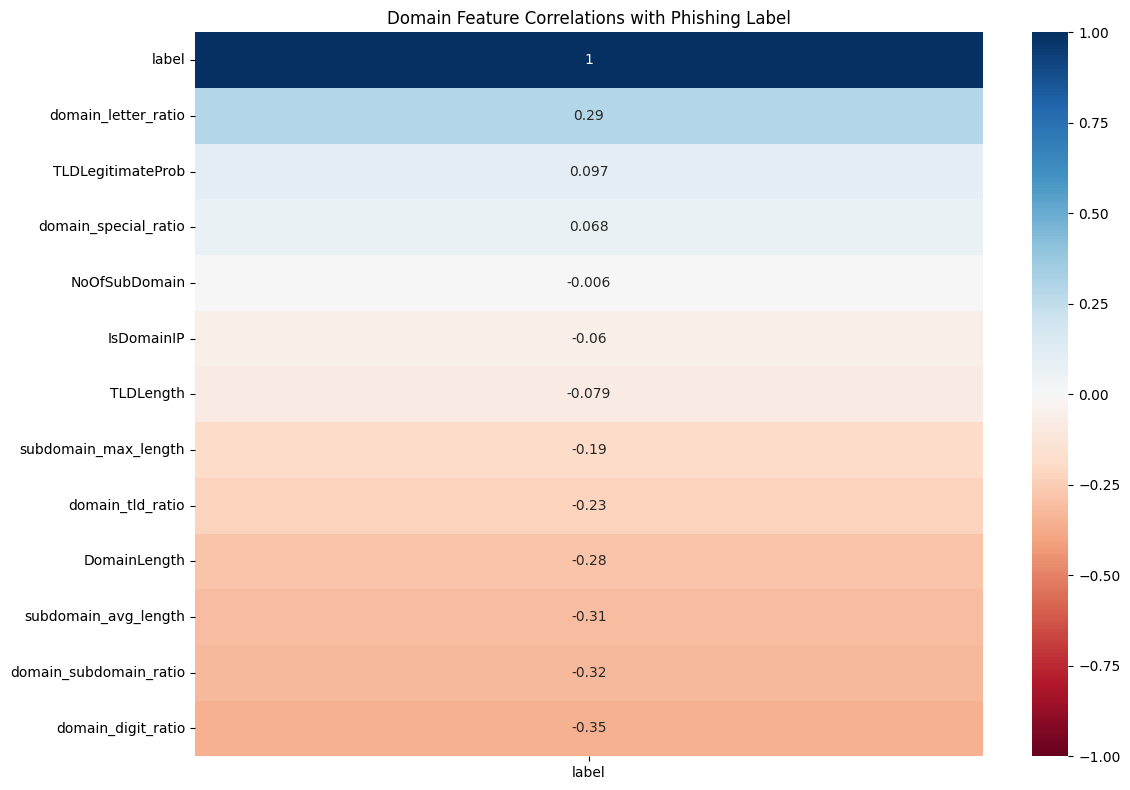


Domain Feature Correlations with Phishing Label:
label                     1.000000
domain_letter_ratio       0.294790
TLDLegitimateProb         0.097389
domain_special_ratio      0.067558
NoOfSubDomain            -0.005955
IsDomainIP               -0.060202
TLDLength                -0.079159
subdomain_max_length     -0.191129
domain_tld_ratio         -0.233718
DomainLength             -0.283152
subdomain_avg_length     -0.306975
domain_subdomain_ratio   -0.324697
domain_digit_ratio       -0.352253
Name: label, dtype: float64


In [281]:
def analyze_domain_correlations(df):
	"""
	Analyze and visualize correlations between domain features and phishing label.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe containing domain features and phishing label
	
	Returns:
	--------
	pandas.Series
		Sorted correlations between features and phishing label
	
	Notes:
	------
	- Analyzes correlations for both basic and advanced domain features
	- Visualizes correlations using a heatmap
	- Features are sorted by correlation strength
	"""
	# Define key domain-related features
	domain_features = [
		# Basic domain metrics
		'DomainLength', 'IsDomainIP', 'TLDLength', 
		'NoOfSubDomain', 'TLDLegitimateProb',
		
		# Character composition features
		'domain_letter_ratio', 'domain_digit_ratio',
		'domain_special_ratio',
		
		# Subdomain analysis
		'subdomain_avg_length', 'subdomain_max_length',
		
		# Component relationships
		'domain_tld_ratio', 'domain_subdomain_ratio'
	]
	
	# Calculate and sort correlations
	correlations = (df[domain_features + ['label']]
				   .corr()['label']
				   .sort_values(ascending=False))
	
	# Visualization
	plt.figure(figsize=(12, 8))
	sns.heatmap(
		df[domain_features + ['label']]
		.corr()[['label']]
		.sort_values(by='label', ascending=False),
		annot=True,
		cmap='RdBu',
		vmin=-1,
		vmax=1
	)
	plt.title('Domain Feature Correlations with Phishing Label')
	plt.tight_layout()
	plt.show()
	
	return correlations

# Execute correlation analysis 
domain_correlations = analyze_domain_correlations(df)
print("\nDomain Feature Correlations with Phishing Label:")
print(domain_correlations)

<font color='#FFB703'>1. Group Features by Correlation Strength</font>

- Strong (>0.5): 
- Moderate (0.3-0.5): domain_letter_ratio, domain_subdomain_ratio, domain_digit_ratio
- Weak (<0.2): remaining features, DomainLength, domain_tld_ratio

<font color='#FFB703'>2. Visualization Steps</font>
- Create violin plots for each correlation group
- Compare distributions between phishing/legitimate
- Analyze feature importance

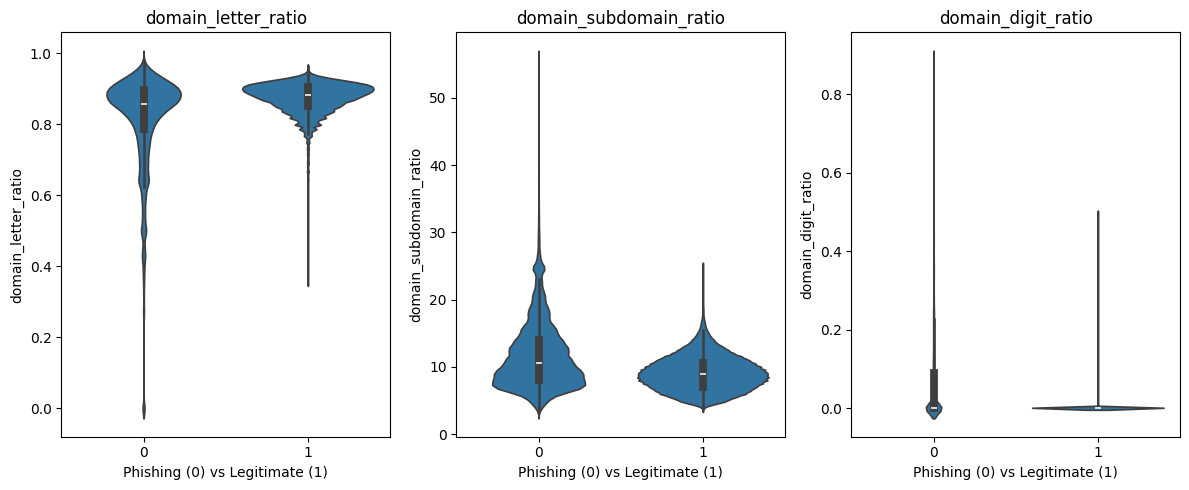


Moderately correlated domain features: ['domain_letter_ratio', 'domain_subdomain_ratio', 'domain_digit_ratio']


In [287]:
def visualize_domain_features(df):
	"""
	Visualize domain feature distributions for moderate correlations using violin plots.
	
	Parameters:
	-----------
	df : pandas.DataFrame
		Input dataframe containing domain features and label
		
	Returns:
	--------
	list
		List of moderately correlated features analyzed
	"""
	# Only moderate correlations (0.2-0.5)
	moderate_features = [
		'domain_letter_ratio', 
		'domain_subdomain_ratio', 
		'domain_digit_ratio'
	]
	
	# Create figure
	plt.figure(figsize=(12, 5))
	
	# Plot moderate correlations
	for idx, feature in enumerate(moderate_features):
		plt.subplot(1, 3, idx+1)
		sns.violinplot(x='label', y=feature, data=df)
		plt.title(f'{feature}')
		plt.xlabel('Phishing (0) vs Legitimate (1)')
	
	plt.tight_layout()
	plt.show()
	
	return moderate_features

# Execute visualization
moderate_domain_features = visualize_domain_features(df)
print("\nModerately correlated domain features:", moderate_domain_features)

From observations, it seems that `domain_digit_ratio` is unsuitable for use later on, as it suffers from extreme outliers. `domain_letter_ratio` and `domain_subdomain_ratio` on the other hand, although also suffering from outliers in the case of `domain_subdomain_ratio`, has a much better distribution.